theory uniform:  [ 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.]
observed 1 (uniform):  [ 110.  105.   91.   82.  116.  100.   86.  104.  100.  106.]
observed 2 (normal):  [  38.   61.   80.  100.  115.  107.  119.  105.   81.   47.]

---------------- Chi2 test results: ---------------------
 - - - observation 1 (created using uniform)
chi2:  10.34
p-val:  0.323667879676
 - - - observation 2 (created using normal)
chi2:  87.1524032825
p-val:  6.05744355397e-15
--------------------------------------------------------


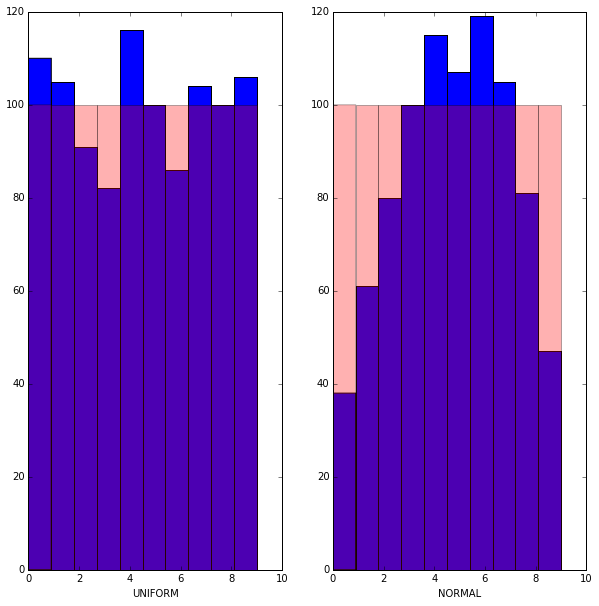

In [98]:
"""
- - - - - THE QUESTION:
Are the observed data representative of the uniform distribution ? 
sources:
http://www.cimt.plymouth.ac.uk/projects/mepres/alevel/fstats_ch5.pdf
https://en.wikipedia.org/wiki/Chi-squared_distribution#Table_of_.CF.872_value_vs_p-value
"""


# = = = Imports:
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


# = = = Constants:
min_val = 0
max_val = 9
n_sample = 1000
bin_min = 0
bin_max = 9
nbins = 10


# = = = Data:
# Our theoretical distribution (here we want to test against uniform distribution):
try_val = n_sample / float(nbins)
try_uniform = []
for x in range(nbins):
    for i in range(int(try_val)):
         try_uniform.append(x)
# Our observations            
# Lets assume that we have 2 types of 'observations' - here we construct them from known distributions
# and we want to know which one of them is compatible with the uniform distribution
obs_uniform = np.random.uniform(min_val, max_val, n_sample)
obs_normal = np.random.normal(5, 3, n_sample)


# = = = Visualizations:
#project them in histograms
fig, ax = plt.subplots(1, 2, figsize=(10, 10)) 
hist_uni,_,_ = ax[0].hist(obs_uniform, range=[bin_min, bin_max], bins=nbins)
hist_try_uni,_,_ = ax[0].hist(try_uniform, range=[bin_min, bin_max], bins=nbins, alpha=0.3, color="red")
ax[0].set_xlabel("UNIFORM")
hist_nor,_,_ = ax[1].hist(obs_normal, range=[bin_min, bin_max], bins=nbins)
ax[1].set_xlabel("NORMAL")
hist_try_uni,_,_ = ax[1].hist(try_uniform, range=[bin_min, bin_max], bins=nbins, alpha=0.3, color="red")
# print the histogram counts
print "theory uniform: ", hist_try_uni
print "observed 1 (uniform): ", hist_uni
print "observed 2 (normal): ", hist_nor


# = = = Statistics: 
# Chi square distribution
# If Z1, ..., Zk are independent, standard normal random variables, then the sum of their squares,
# Q = Σ(i=1->k) Zi^2 , is distributed according to the chi-squared distribution with k degrees of freedom. 
# 
# The distribution that we use:
# Σ(i=1->k) (Oi - Ei)^2 / Ei
# is approximately chi square distribution with k degrees of freedom 
# We devided by the expected Ei, because we want to standarize the deviations


# = = = Checks:
# 1)
# The chi2 test is invalid when the observed or expected frequencies in each category are too small. 
# A typical rule is that all of the observed and expected frequencies should be at least 5.
# 2)
# The default degrees of freedom, k-1, are for the case when no parameters of the distribution are estimated. 
# If p parameters are estimated by efficient maximum likelihood then the correct degrees of freedom are k-1-p. 
# If the parameters are estimated in a different way, then the dof can be between k-1-p and k-1. 
# 3)
# However, it is also possible that the asymptotic distribution is not a chisquare, in which case this test is not appropriate.


# Perfrom the test
# When just f_obs is given, it is assumed that the expected frequencies are uniform and given by the mean of the observed frequencies.
print"\n---------------- Chi2 test results: ---------------------"
print " - - - observation 1 (created using uniform)"
uni_ch2, uni_p = stats.chisquare(hist_uni)
print "chi2: ", uni_ch2
print "p-val: ", uni_p
print " - - - observation 2 (created using normal)"
nor_ch2, nor_p = stats.chisquare(hist_nor)
print "chi2: ", nor_ch2
print "p-val: ", nor_p
print "--------------------------------------------------------"
#if we want we can explicity provide the expected distribution - uniform here calculated => results are ~same
#print"\nChi2 test results provided expected (uniform) distribution:"
#print " - - - observation 1 (created using uniform)"
#uni_ch2, uni_p = stats.chisquare(hist_uni, f_exp=hist_try_uni)
#print "chi2: ", uni_ch2
#print "p-val: ", uni_p
#print " - - - observation 2 (created using normal)"
#nor_ch2, nor_p = stats.chisquare(hist_nor, f_exp=hist_try_uni)
#print "chi2: ", nor_ch2
#print "p-val: ", nor_p



# !Final Results!
# = = = Structure Question / Answer:
# 1) Quatify the size of difference by choosing a test statistic
# -> here we choose the chi-sqared statistic
# 2) Define a null hypothesis H0
# -> The observed distribution follows a uniform distribution
# 3) Compute p-value
# -> we could compute first the chi2 value itself and then go to tables with values, alpha, df and get the p-val
# e.g. https://en.wikipedia.org/wiki/Chi-squared_distribution#Table_of_.CF.872_value_vs_p-value
# -> Or quicly using scipy.stats.chisquare we get 
# p-val:  0.639201792735 for the observation 1 (done using uniform)
# p-val:  2.10907898988e-16 for the observation 2 (done using normal)
# 4) Interpret results
# a P value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the truth of the null hypothesis.
# A low P value suggests that your sample provides enough evidence that you can reject the null hypothesis for the entire population.
# Here for observation 1 (inform constructed), p-val big => null hypo stands => obs 1 is uniform
# Here for observation 2 (normal constructed), p-val small => null hypo regected => obs 2 is not uniform



